In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [38]:
df = pd.read_csv("all_cars_merged.csv")
df.head()

,Unnamed: 0,model,year,price,mileage,tax,mpg,engineSize,Diesel,Electric,...,Petrol,Automatic,Manual,Other.1,Semi-Auto,Audi,BMW,Hyundai,Mercedes,Toyota
0,0,GT86,2016,16000,24089,265,36.2,2.0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,1,GT86,2017,15995,18615,145,36.2,2.0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,2,GT86,2015,13998,27469,265,36.2,2.0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,3,GT86,2017,18998,14736,150,36.2,2.0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,4,GT86,2017,17498,36284,145,36.2,2.0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [39]:
df.drop(columns="Unnamed: 0",inplace=True)
df.head()

,model,year,price,mileage,tax,mpg,engineSize,Diesel,Electric,Hybrid,...,Petrol,Automatic,Manual,Other.1,Semi-Auto,Audi,BMW,Hyundai,Mercedes,Toyota
0,GT86,2016,16000,24089,265,36.2,2.0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,GT86,2017,15995,18615,145,36.2,2.0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,GT86,2015,13998,27469,265,36.2,2.0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3,GT86,2017,18998,14736,150,36.2,2.0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,GT86,2017,17498,36284,145,36.2,2.0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [40]:
df.tail()

,model,year,price,mileage,tax,mpg,engineSize,Diesel,Electric,Hybrid,...,Petrol,Automatic,Manual,Other.1,Semi-Auto,Audi,BMW,Hyundai,Mercedes,Toyota
46161,X3,2016,19000,40818,150,54.3,2.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
46162,5 Series,2016,14600,42947,125,60.1,2.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
46163,3 Series,2017,13100,25468,200,42.8,2.0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
46164,1 Series,2014,9930,45000,30,64.2,2.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
46165,X1,2017,15981,59432,125,57.6,2.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


### Data Cleaning

In [41]:
df['model'] = df['model'].apply(lambda x:x.strip())

In [42]:
df.shape

(46166, 21)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46166 entries, 0 to 46165
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model       46166 non-null  object 
 1   year        46166 non-null  int64  
 2   price       46166 non-null  int64  
 3   mileage     46166 non-null  int64  
 4   tax         46166 non-null  int64  
 5   mpg         46166 non-null  float64
 6   engineSize  46166 non-null  float64
 7   Diesel      46166 non-null  int64  
 8   Electric    46166 non-null  int64  
 9   Hybrid      46166 non-null  int64  
 10  Other       46166 non-null  int64  
 11  Petrol      46166 non-null  int64  
 12  Automatic   46166 non-null  int64  
 13  Manual      46166 non-null  int64  
 14  Other.1     46166 non-null  int64  
 15  Semi-Auto   46166 non-null  int64  
 16  Audi        46166 non-null  int64  
 17  BMW         46166 non-null  int64  
 18  Hyundai     46166 non-null  int64  
 19  Mercedes    46166 non-nul

In [44]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,Diesel,Electric,Hybrid,Other,Petrol,Automatic,Manual,Other.1,Semi-Auto,Audi,BMW,Hyundai,Mercedes,Toyota
count,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000,46166.000000
mean,2017.100464,20788.309968,23526.659706,123.383442,55.443913,1.909262,0.517740,0.000065,0.062622,0.003227,0.416345,0.312936,0.341745,0.000108,0.345211,0.231079,0.233527,0.105272,0.284170,0.145952
std,2.215099,11605.096412,22172.283833,66.615330,20.038477,0.604635,0.499691,0.008061,0.242284,0.056720,0.492958,0.463694,0.474300,0.010407,0.475442,0.421527,0.423079,0.306907,0.451023,0.353061
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,12990.000000,6445.000000,125.000000,45.600000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,18750.000000,17467.500000,145.000000,55.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,25950.000000,33737.750000,145.000000,64.200000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df.isnull().sum()

model         0
year          0
price         0
mileage       0
tax           0
mpg           0
engineSize    0
Diesel        0
Electric      0
Hybrid        0
Other         0
Petrol        0
Automatic     0
Manual        0
Other.1       0
Semi-Auto     0
Audi          0
BMW           0
Hyundai       0
Mercedes      0
Toyota        0
dtype: int64

In [46]:
df_new = df.drop(columns=["Other","Other.1"])

### Exploratory Data Analysis

In [47]:
df.duplicated().value_counts()

False    45562
True       604
dtype: int64

In [48]:
# check the count of the unique value of each categorical variable
# Making a list of all catrgorical variables
cat_col = list(df_new.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df_new[column].value_counts())
    print("-" * 50)
    print(f"We have {df_new[column].nunique()} type of models")

C Class     3747
A Class     2561
3 Series    2443
Yaris       2122
1 Series    1969
            ... 
RS7            1
A2             1
200            1
Accent         1
Amica          1
Name: model, Length: 111, dtype: int64
--------------------------------------------------
We have 111 type of models


##### Univarite Analysis

In [55]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [56]:
df_new.head()

,model,year,price,mileage,tax,mpg,engineSize,Diesel,Electric,Hybrid,Petrol,Automatic,Manual,Semi-Auto,Audi,BMW,Hyundai,Mercedes,Toyota
0,GT86,2016,16000,24089,265,36.2,2.0,0,0,0,1,0,1,0,0,0,0,0,1
1,GT86,2017,15995,18615,145,36.2,2.0,0,0,0,1,0,1,0,0,0,0,0,1
2,GT86,2015,13998,27469,265,36.2,2.0,0,0,0,1,0,1,0,0,0,0,0,1
3,GT86,2017,18998,14736,150,36.2,2.0,0,0,0,1,0,1,0,0,0,0,0,1
4,GT86,2017,17498,36284,145,36.2,2.0,0,0,0,1,0,1,0,0,0,0,0,1


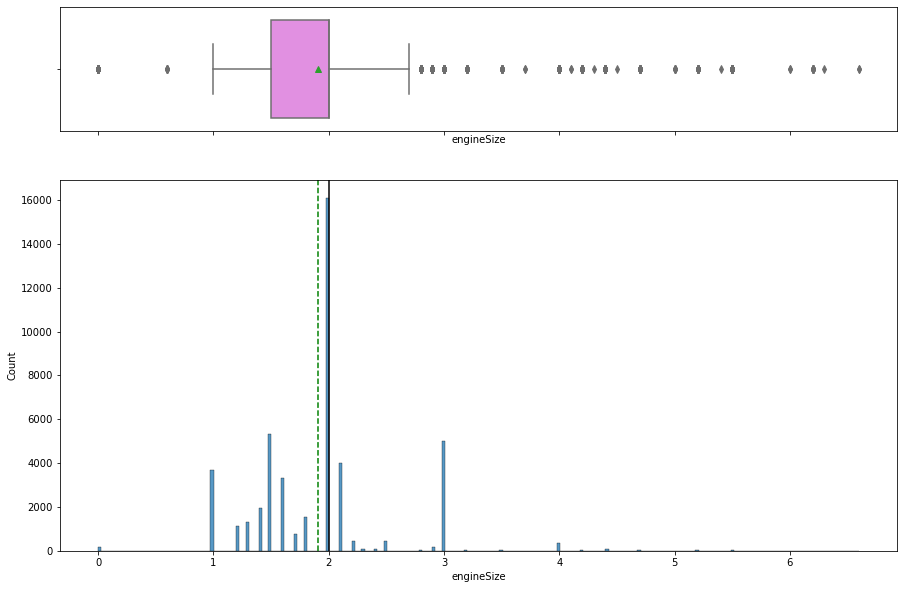

In [58]:
# Observation on Engine Size
histogram_boxplot(data=df_new, feature="engineSize" )

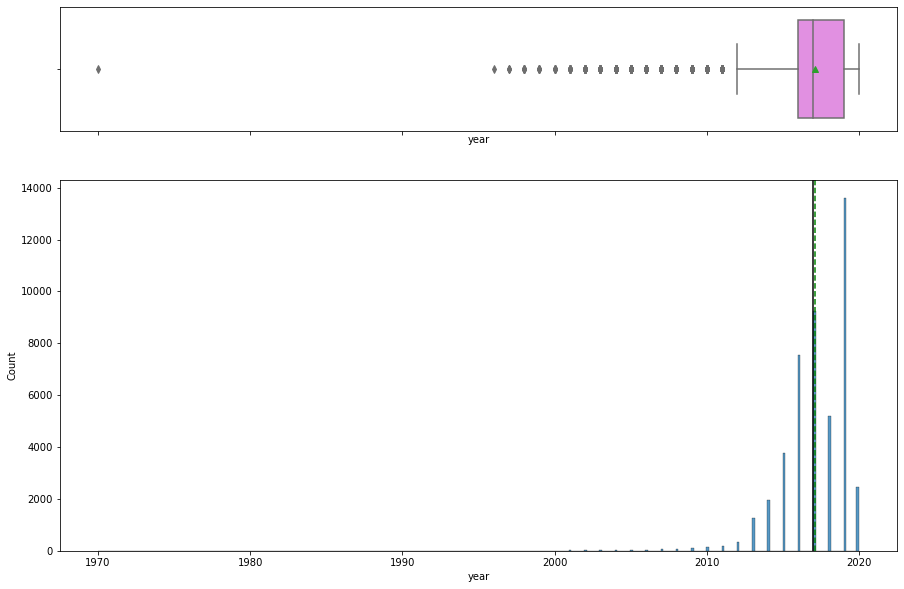

In [59]:
# Observation on Year
histogram_boxplot(df_new, "year" )

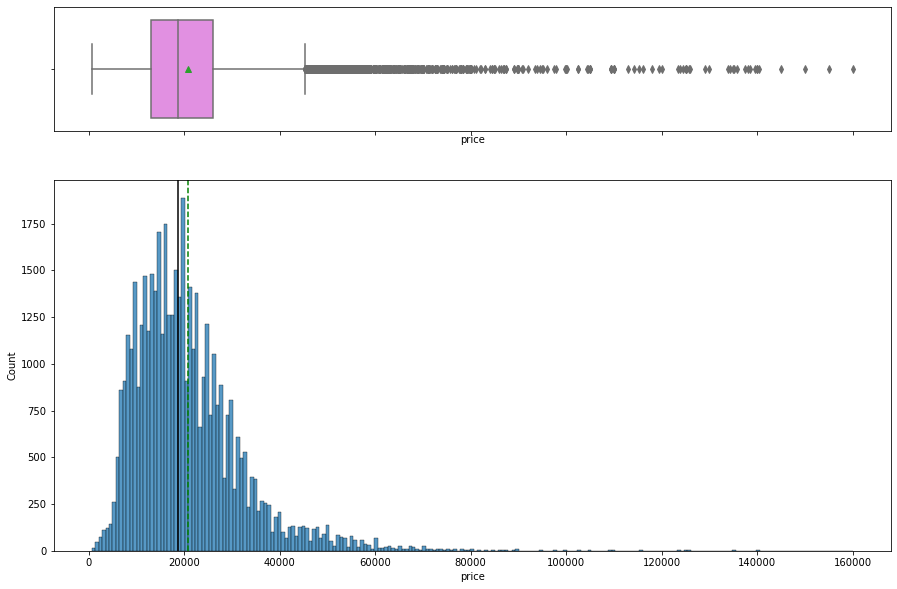

In [60]:
# Observation on Engine Size
histogram_boxplot(df_new, "price" )

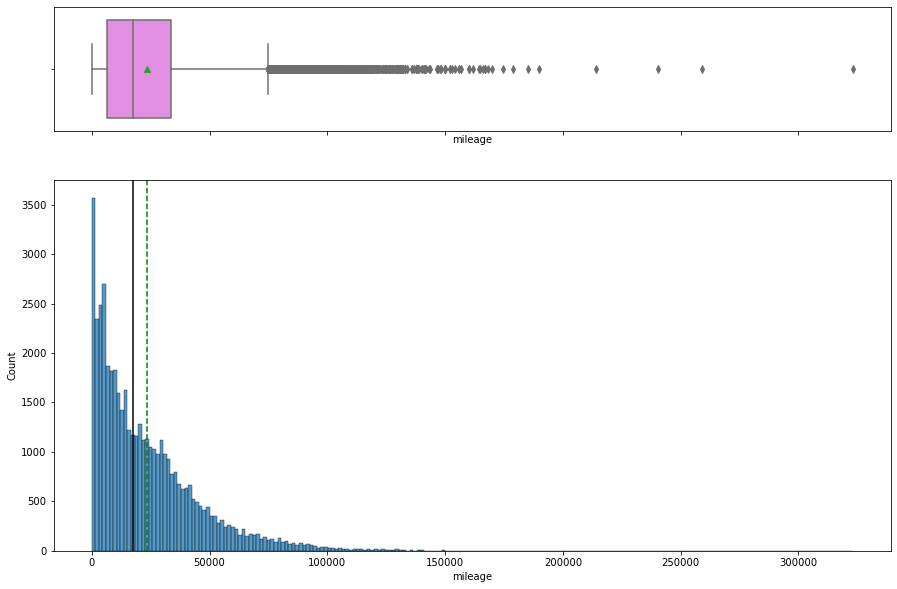

In [61]:
# Observation on Engine Size
histogram_boxplot(df_new, "mileage" )

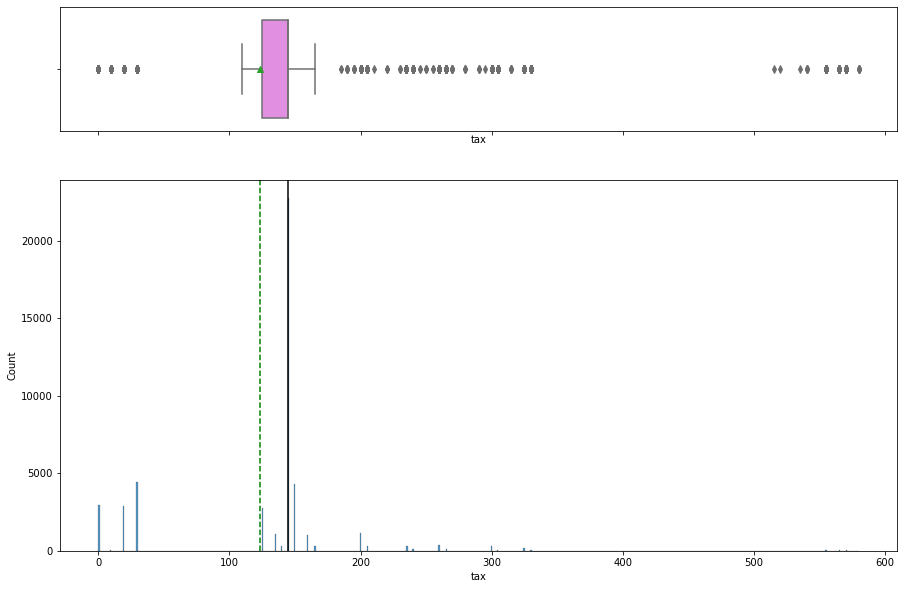

In [62]:
# Observation on Engine Size
histogram_boxplot(df_new, "tax" )

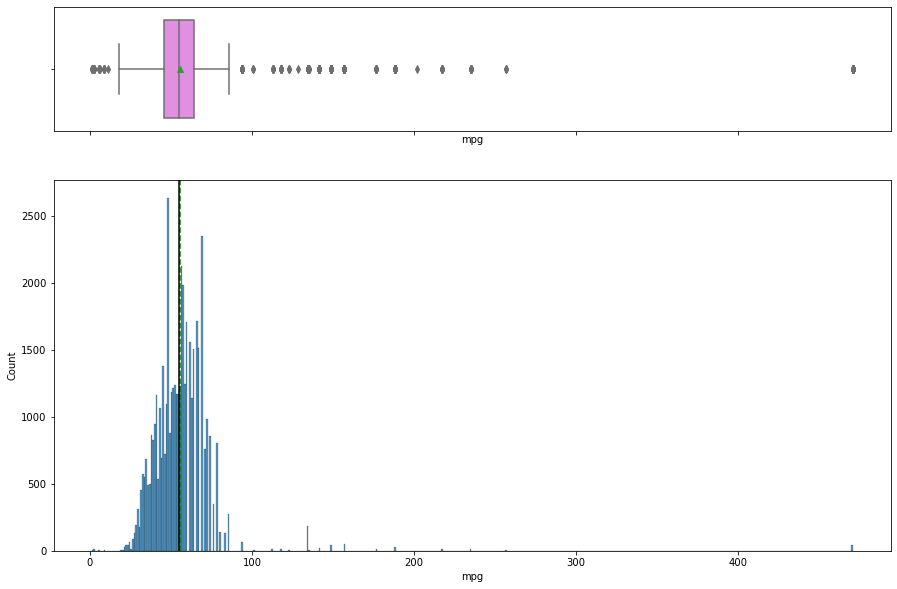

In [63]:
# Observation on Engine Size
histogram_boxplot(df_new, "mpg" )

###### Bivarite Analysis

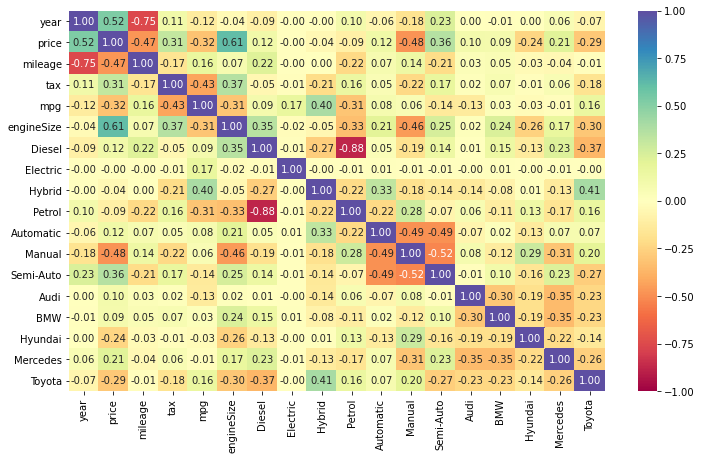

In [64]:
cols_list = df_new.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_new[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Model vs Price

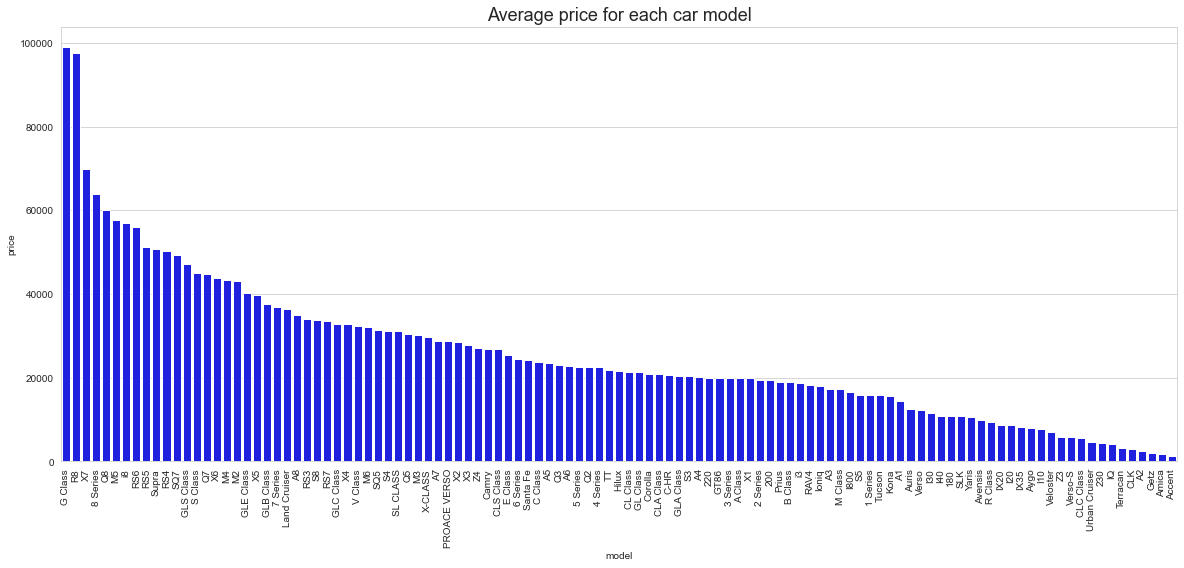

In [70]:
mode_l=pd.DataFrame(df.groupby('model')['price'].mean()).reset_index(inplace= False)
mode_l
mode_l.sort_values("price", ascending=False)
model_sorted= mode_l.sort_values("price", ascending=False)
fig= plt.figure(figsize=(20,8))
# make bar plot with sns
sns.set_style("whitegrid")
sns_plot = sns.barplot(x = 'model', y = 'price', data = model_sorted, color='blue')
plt.xlabel("model")
plt.ylabel("price")
plt.xticks(rotation=90)
plt.title("Average price for each car model", size=18)
plt.show()
#fig.savefig('Car model prices.jpg')

### Mileage vs Price

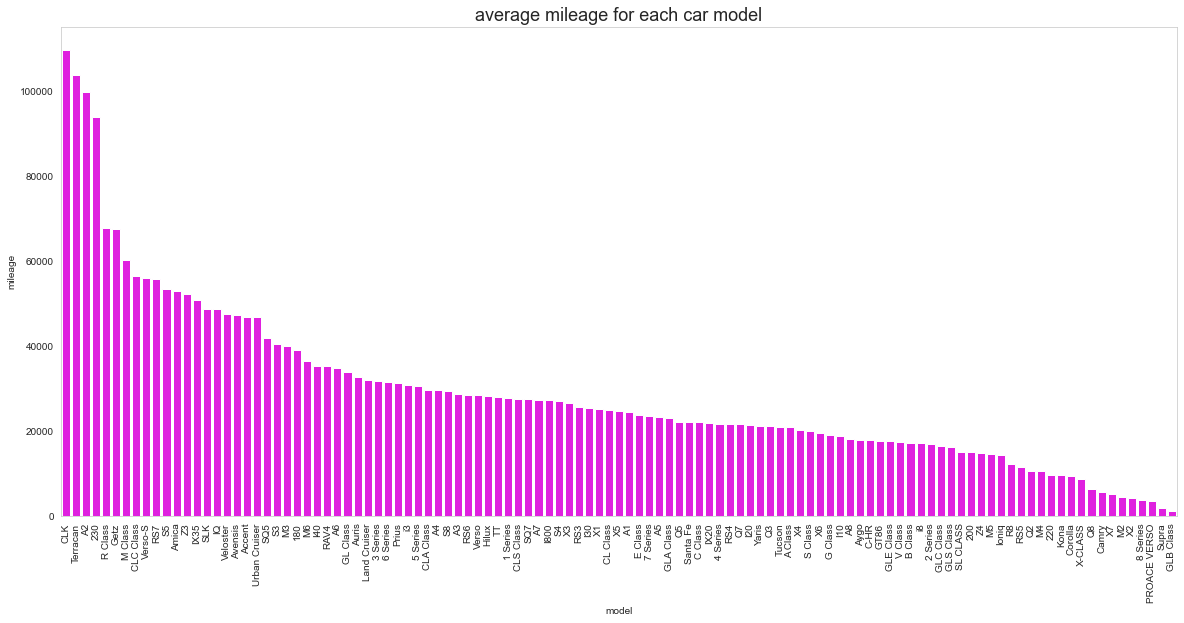

In [71]:
mile_age= pd.DataFrame(df.groupby('model')['mileage'].mean()).sort_values('mileage',ascending=False).reset_index(inplace= False)
mile_age
sns.set_style("whitegrid", {'axes.grid': False})
fig= plt.figure(figsize=(20, 9))
sns_plot = sns.barplot(x = 'model', y = 'mileage', data = mile_age, color='magenta')
plt.xlabel("model")
plt.ylabel("mileage")
plt.xticks(rotation=90)
plt.title("average mileage for each car model", size=18)
plt.show()

### Year vs Price

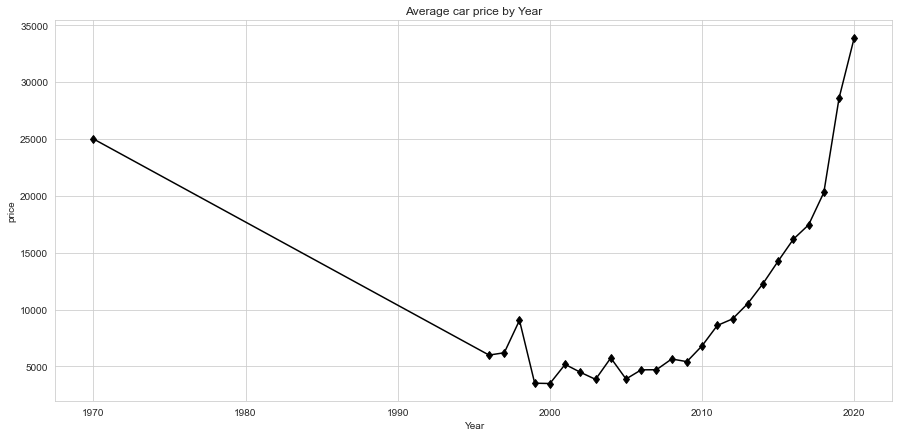

In [72]:
year_price = pd.DataFrame(df.groupby('year')['price'].mean()).sort_values('price',ascending=False).reset_index(inplace= False)
year_price
fig= plt.figure(figsize=(15, 7))
plt.plot(df.groupby('year')['price'].mean(), marker='d', color='black')
plt.title('Average car price by Year')
plt.xlabel('Year')
plt.ylabel('price')
plt.grid()
plt.show()

### Modelling

In [86]:
df1 = pd.get_dummies(df_new,columns=['model'], prefix='', prefix_sep='')
df1.head()

,year,price,mileage,tax,mpg,engineSize,Diesel,Electric,Hybrid,Petrol,...,X3,X4,X5,X6,X7,Yaris,Z3,Z4,i3,i8
0,2016,16000,24089,265,36.2,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2017,15995,18615,145,36.2,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015,13998,27469,265,36.2,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,18998,14736,150,36.2,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2017,17498,36284,145,36.2,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [87]:
X = df1.drop(['price'],axis='columns')
y = df1.price

In [89]:
X.head()

,year,mileage,tax,mpg,engineSize,Diesel,Electric,Hybrid,Petrol,Automatic,...,X3,X4,X5,X6,X7,Yaris,Z3,Z4,i3,i8
0,2016,24089,265,36.2,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,18615,145,36.2,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,27469,265,36.2,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,14736,150,36.2,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,36284,145,36.2,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Linear Regeression

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8398831385222733

#### Finding best model using GRID SEARCH CV

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(max_iter=5000),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.833356,{'normalize': False}
1,lasso,0.832671,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.920140,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(max_features='sqrt', random_state=1)
rr.fit(X_train,y_train)
pickle.dump(rr, open('model.pkl','wb'))
rr.score(X_test,y_test)

0.9554929506471233

In [98]:
def predict_price(brand, model, year, mileage, tax, mpg, engineSize, fuel_type, transmission_type):    
    model_index = np.where(X.columns==model)[0][0]
    brand_index = np.where(X.columns==brand)[0][0]
    fuel_type_index = np.where(X.columns==fuel_type)[0][0]
    transmission_type_index = np.where(X.columns==transmission_type)[0][0]

    
    x = np.zeros(len(X.columns))
    x[0] = year
    x[1] = mileage
    x[2] = tax
    x[3] = mpg
    x[4] = engineSize
    if brand_index >= 0:
        x[brand_index] = 1
    if model_index >= 0:
        x[model_index] = 1
    if fuel_type_index >= 0:
        x[fuel_type_index] = 1
    if transmission_type_index >= 0:
        x[transmission_type_index] = 1
    return rr.predict([x])[0]

In [105]:
predict_price("Toyota", "GT86", 2020, 36284,145, 36.2, 2.0, "Petrol", "Automatic")

24912.22